In [9]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


from tensorflow.keras import callbacks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random

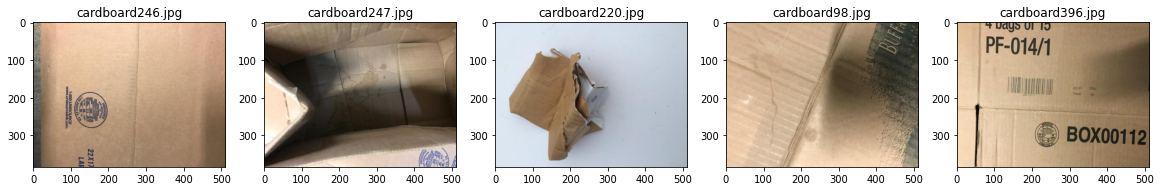

In [15]:
plt.figure(figsize=(20,20))
test_folder=r'../raw_data/Garbage_classification/cardboard/'
img_folder = test_folder
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [16]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'../raw_data/Garbage_classification/'

In [17]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name# extract the image array and class name
img_data, class_name =create_dataset(r'../raw_data/Garbage_classification/')

In [18]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [37]:
X_data = np.array(img_data)


In [46]:
X_data.shape
#y_data.size

(2527, 200, 200, 3)

In [63]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [64]:
y_data= np.array(target_val)

In [65]:
data = {'X':img_data,
        'y':target_val}
 

In [66]:
df = pd.DataFrame(data)

In [67]:
df['X'][0].shape

(200, 200, 3)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

In [70]:
X_train.shape

(1693, 200, 200, 3)

In [71]:
X_train[0].shape

(200, 200, 3)

In [72]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

In [74]:
y_train_cat[0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

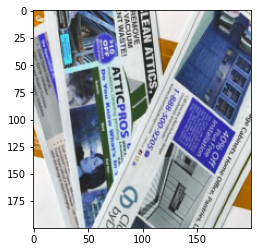

In [73]:
img = X_train[0]


plt.imshow(img)

https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

In [82]:
def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3,3), input_shape=(200, 200,3),activation='relu',padding='same'))
    
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3),activation='relu',padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(128, (3,3),activation='relu',padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    ### Flattening
    # YOUR CODE HERE
    model.add(layers.Flatten())
    ### One fully connected
    # YOUR CODE HERE
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    # YOUR CODE HERE
    model.add(layers.Dropout(rate=0.5))
    model.add(layers.Dense(6, activation='softmax'))
    ### Model compilation
    # YOUR CODE HERE
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model
    
model = initialize_model()

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32768)            

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
X_train.shape

(1693, 200, 200, 3)

In [88]:
model = initialize_model()
history =model.fit(X_train, y_train_cat, 
          validation_data=(X_test, y_test_cat),
          epochs=5, 
          batch_size=32, 
          verbose=0)

In [89]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)


(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

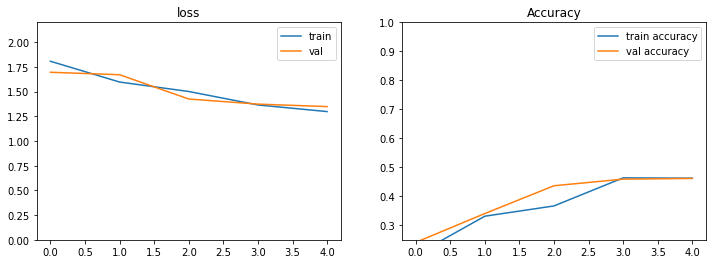

In [90]:
plot_history(history,title='',exp_name='')

In [91]:
result= model.evaluate(X_test, y_test_cat, verbose=0)
result

[1.347822666168213, 0.4616307020187378]